In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
import keras.backend as K
from scipy.stats import pearsonr, spearmanr, ttest_1samp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=15
import keras.metrics

Using Theano backend.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_varcc0bc.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Preallocating 7713/8119 Mb (0.950000) on cuda
Mapped name None to device cuda: GeForce GTX 1080 (0000:02:00.0)


In [2]:
neun_model = load_model('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/model_2.hdf5', compile=False)

In [3]:
X_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/chr4_summit_centered_validation_set_X.npy')
Y_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/chr4_summit_centered_validation_set_Y.npy')

In [4]:
model_pred_valid = neun_model.predict(X_valid)

Validation: (array([0.59612151]), array([0.]))
Validation: SpearmanrResult(correlation=0.6302513600445543, pvalue=0.0)


/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


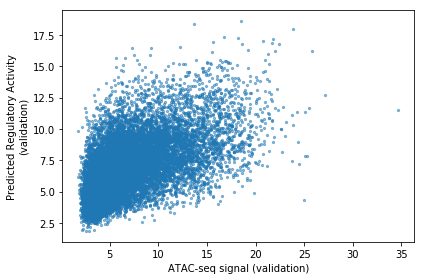

In [5]:
plt.scatter(Y_valid, model_pred_valid, s=5, alpha=0.5)
plt.xlabel("ATAC-seq signal (validation)")
plt.ylabel("Predicted Regulatory Activity\n(validation)")


plt.savefig("neun_model_held_out_chr_prediction.svg")

print("Validation:",pearsonr(Y_valid, model_pred_valid))
print("Validation:",spearmanr(Y_valid, model_pred_valid))

In [9]:
X_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/chrs_training_summit_centered_training_set_X.npy')
Y_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/chrs_training_summit_centered_training_set_Y.npy')

In [10]:
model_pred_train = neun_model.predict(X_train)

Validation: (array([0.64743581]), array([0.]))
Validation: SpearmanrResult(correlation=0.6694366228798229, pvalue=0.0)


/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


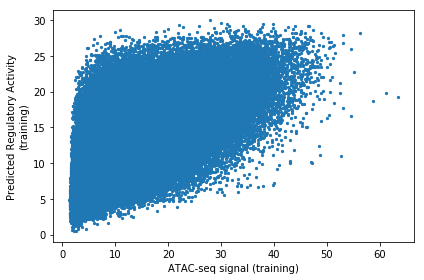

In [14]:
plt.scatter(Y_train, model_pred_train, s=5, alpha=0.5)
plt.xlabel("ATAC-seq signal (training)")
plt.ylabel("Predicted Regulatory Activity\n(training)")


plt.savefig("neun_model_training_chrs_prediction.png")

print("Validation:",pearsonr(Y_train, model_pred_train))
print("Validation:",spearmanr(Y_train, model_pred_train))

In [12]:
ref_bin1 = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_human_monocyte_brain/differential_peaks_models/snps_overlapping_bin1_rough_region_reference.npy")
alt_bin1 = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_human_monocyte_brain/differential_peaks_models/snps_overlapping_bin1_rough_region_alternate.npy")


In [13]:
ref_scores = microglia_model.predict(ref_bin1)
alt_scores = microglia_model.predict(alt_bin1)